In [346]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder, StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import silhouette_score

In [347]:
# load data set
data = pd.read_csv('marketing_campaign.csv', delimiter='	')

data.head(21)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [349]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>],
       [<Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>],
       [<Axes: title={'center': 'NumWebPurchases'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

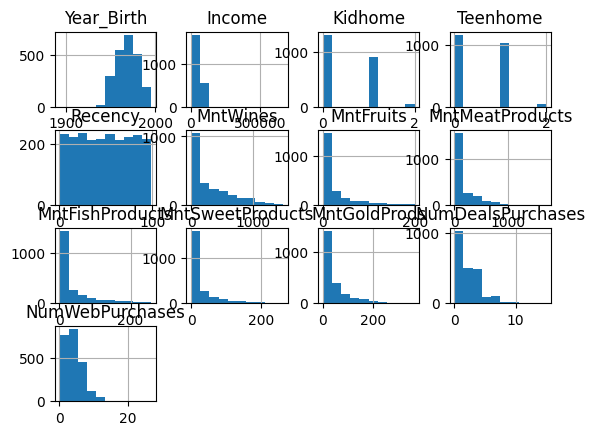

In [350]:
data.iloc[:,1:17].hist()

array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>],
       [<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>],
       [<Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>],
       [<Axes: title={'center': 'NumWebPurchases'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

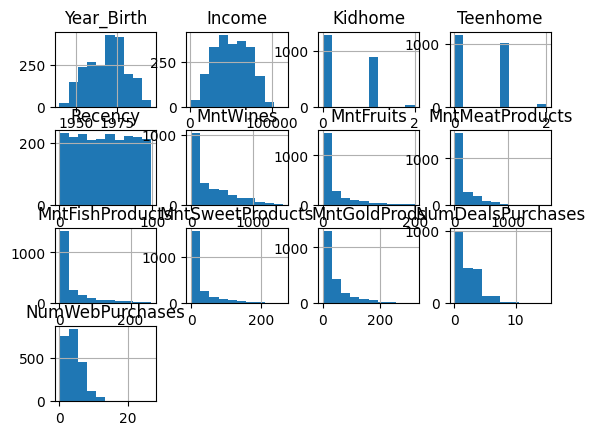

In [351]:
data = data[(data["Year_Birth"] > 1924)]
data = data[(data["Income"] < 150000)]
data.iloc[:,1:17].hist()

In [352]:
# remove all null data
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2205 non-null   int64  
 1   Year_Birth           2205 non-null   int64  
 2   Education            2205 non-null   object 
 3   Marital_Status       2205 non-null   object 
 4   Income               2205 non-null   float64
 5   Kidhome              2205 non-null   int64  
 6   Teenhome             2205 non-null   int64  
 7   Dt_Customer          2205 non-null   object 
 8   Recency              2205 non-null   int64  
 9   MntWines             2205 non-null   int64  
 10  MntFruits            2205 non-null   int64  
 11  MntMeatProducts      2205 non-null   int64  
 12  MntFishProducts      2205 non-null   int64  
 13  MntSweetProducts     2205 non-null   int64  
 14  MntGoldProds         2205 non-null   int64  
 15  NumDealsPurchases    2205 non-null   int64 

In [353]:
# preprocessing data
# encode non-numeric data
encoder = LabelEncoder()
data['education_encoded'] = encoder.fit_transform(data.iloc[:,2])
data['married_encoded'] = encoder.fit_transform(data.iloc[:,3])

# choose the subset of numeric data for analysis
cd = data.select_dtypes(include='number')

cd.info()
# normalise data
sc = StandardScaler()
cd_scaled = sc.fit_transform(cd)
cd_scaled = pd.DataFrame(cd_scaled, columns=cd.columns)

cd_scaled = normalize(cd)
cd_scaled = pd.DataFrame(cd_scaled, columns=cd.columns)

cd_scaled = sc.fit_transform(cd.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,26,27]])
cd_scaled = pd.DataFrame(cd_scaled, columns=cd.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,26,27]].columns)

cd_scaled = normalize(cd.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,26,27]])
cd_scaled = pd.DataFrame(cd_scaled, columns=cd.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,26,27]].columns)

cd_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2205 non-null   int64  
 1   Year_Birth           2205 non-null   int64  
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   int64 

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,education_encoded,married_encoded
0,0.033638,0.999322,0.000000,0.000000,0.000997,0.010915,0.001513,0.009385,0.002956,0.001513,0.001513,0.000052,0.000138,0.000172,0.000069,0.000120,0.000034,0.000069
1,0.042126,0.999112,0.000022,0.000022,0.000819,0.000237,0.000022,0.000129,0.000043,0.000022,0.000129,0.000043,0.000022,0.000022,0.000043,0.000108,0.000043,0.000086
2,0.027428,0.999603,0.000000,0.000000,0.000363,0.005946,0.000684,0.001773,0.001549,0.000293,0.000586,0.000014,0.000112,0.000028,0.000140,0.000056,0.000028,0.000070
3,0.074252,0.997238,0.000037,0.000000,0.000973,0.000412,0.000150,0.000749,0.000374,0.000112,0.000187,0.000075,0.000075,0.000000,0.000150,0.000225,0.000075,0.000187
4,0.033964,0.999415,0.000017,0.000000,0.001612,0.002966,0.000737,0.002023,0.000789,0.000463,0.000257,0.000086,0.000086,0.000051,0.000103,0.000086,0.000069,0.000051


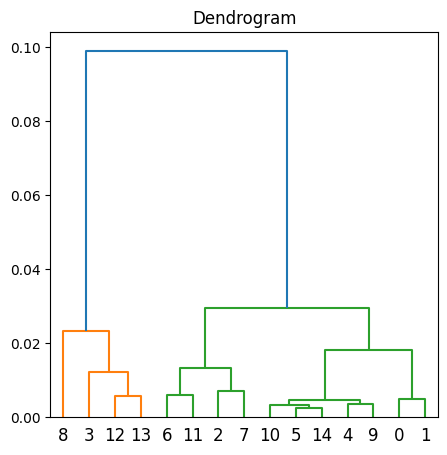

In [354]:
subset_data = cd_scaled.sample(n=15)

plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend_norm = shc.dendrogram(shc.linkage(subset_data, method='ward'))

In [355]:
# deciding number of features to analyse
pca = PCA()
pca.fit(cd_scaled)

cum_var = np.cumsum(pca.explained_variance_ratio_)

# choose the number of components to keep based on 95% variance
n_components = np.argmax(cum_var >= 0.95)

print(n_components) # 12 means index 12 and so 13 components

pca = PCA(n_components=n_components+1)
reduced_data = pca.fit_transform(cd_scaled)

1


In [356]:
# choose best number of clusters using silhouette score
best_k = 2
best_score = 0

# calculate silhouette score for each value of k from 2 to 10
for k in range(2,11):
    agg_clus = AgglomerativeClustering(n_clusters=k, linkage='ward')
    clust = agg_clus.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, clust)
    if score > best_score:
        best_score = score
        best_k = k

print(f"The best Silhouette score is: {best_score} for k={best_k}")

The best Silhouette score is: 0.8897658730418001 for k=2


In [357]:
# perform the clustering
agg_clus = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clust_pred = agg_clus.fit_predict(reduced_data)

Text(0.5, 1.0, 'Visual representation of clustering')

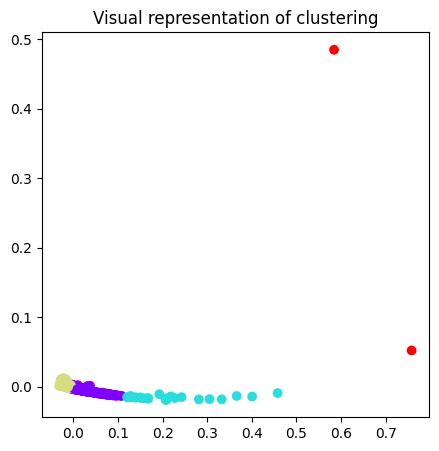

In [358]:
plt.figure(figsize=(5,5))
plt.scatter(x=reduced_data[:,0], y=reduced_data[:,1], c=agg_clus.labels_, cmap='rainbow')
plt.title('Visual representation of clustering')

In [359]:
data['Clusters'] = agg_clus.labels_
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

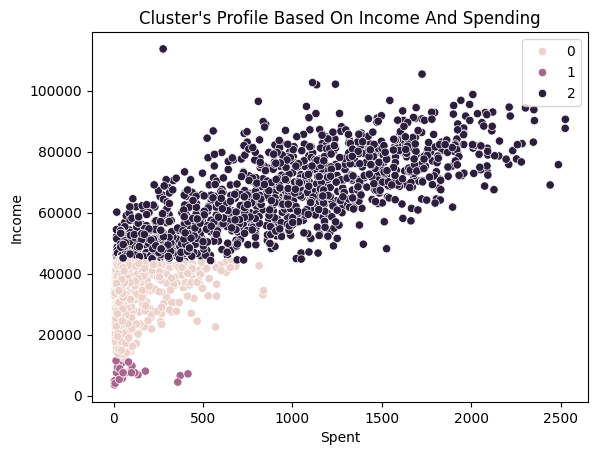

In [361]:
data = data[(data["Clusters"] < 3)]
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

